In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dropouts = pd.read_csv('data/training_2009.csv')

In [3]:
dropouts

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,2,Fake record,WKEC,415,5194,Everett,Everett,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Fake record,GRREC,199,1648,Kingfisher,Kingfisher,0,Town: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Fake record,GRREC,142,1564,Diamond Lake,Diamond Lake,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,Fake record,OVEC,238,2230,Orange,Pike,0,Suburb: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Fake record,NKCES,517,7658,Foster,Kent,0,Rural: Fringe,2009,...,NaN,0.5491,0.2428,24458.5,271.53949,0.757102,0.375890,NaN,36100.0,0.591997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,Fake record,CKEC,262,3820,Oceanview,Burton,0,City: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52938,111985,Fake record,CKEC,289,3270,Universal,Jupiter,0,Town: Fringe,2009,...,NaN,0.4725,0.1686,19500.0,216.48997,0.662626,0.441241,NaN,32100.0,0.475793
52939,111986,Fake record,NKCES,541,7810,Cilian,Cilian,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52940,111988,Fake record,WKEC,421,5856,Zirvas,Rainbow,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dropouts.describe()

,sid,first_dist_code,first_hs_code,first_hs_alt,chrt_ninth,male,frpl,iep,ell,gifted,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
count,52942.000000,52942.000000,52942.000000,52942.000000,52942.0,52931.000000,52258.000000,52942.000000,52942.000000,52942.000000,...,7411.000000,21149.000000,21149.000000,20983.000000,20983.000000,21149.000000,13640.000000,7509.000000,21149.000000,21149.000000
mean,55852.370273,380.206528,5263.878131,0.053398,2009.0,0.520357,0.604022,0.113653,0.015791,0.190189,...,0.384539,0.473196,0.276767,19388.214507,215.248927,0.643495,0.472697,0.312635,32081.242612,0.530085
std,32377.301687,163.563276,2786.710570,0.224828,0.0,0.499590,0.489064,0.317392,0.124667,0.392454,...,0.057170,0.130927,0.151887,5198.379302,57.712667,0.149136,0.112298,0.099368,6327.732833,0.095979
min,2.000000,103.000000,1106.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.310300,0.044100,0.000700,5750.000000,63.836788,0.261312,0.159809,0.170209,20600.000000,0.309300
25%,27807.500000,238.000000,2850.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.328300,0.383100,0.172800,14642.500000,162.561770,0.466288,0.377848,0.251012,26300.000000,0.449474
50%,55795.500000,388.000000,5294.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.380100,0.459700,0.215000,20500.000000,227.592030,0.663946,0.432884,0.293832,33100.000000,0.541185
75%,83894.750000,538.000000,7492.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.431900,0.541300,0.422700,24093.000000,267.481690,0.778180,0.535935,0.398137,36100.000000,0.593796
max,111990.000000,613.000000,9902.000000,1.000000,2009.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.697000,0.907100,0.735600,34942.000000,387.927830,0.950102,0.923592,0.623265,60900.000000,0.793860


In [5]:
dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sid                              52942 non-null  int64  
 1   sid_type                         52942 non-null  object 
 2   first_coop_code                  52942 non-null  object 
 3   first_dist_code                  52942 non-null  int64  
 4   first_hs_code                    52942 non-null  int64  
 5   first_dist_name                  52942 non-null  object 
 6   first_hs_name                    52942 non-null  object 
 7   first_hs_alt                     52942 non-null  int64  
 8   first_hs_urbanicity              52484 non-null  object 
 9   chrt_ninth                       52942 non-null  int64  
 10  male                             52931 non-null  float64
 11  race_ethnicity                   52257 non-null  object 
 12  frpl              

In [6]:
#the features selected in this dataframe are those used in a previous study at the Harvard Center for Education Policy and the Stategic Data Project
fs_dropouts = dropouts[["sid","dropout",
              "male",
              "race_ethnicity",
              "math_ss",
              "read_ss",
              "gifted",
              "ever_alternative",
              "iep",
              "pct_days_absent",
              "gpa",
              "frpl",
              "ell"]]

### Let's define these features (https://hwpi.harvard.edu/files/sdp/files/step_1_stata_identify_data_specification_guide.pdf)

    - "dropout" - target variable, whether or not student dropped out,
    - "male",
    - "race_ethnicity",
    - "math_ss" - math standardized test score,
    - "read_ss" - reading standardized test score,
    - "gifted" - whether student was ever enrolled in a gifted program,
    - "ever_alternative" - whether student was ever enrolled in a alternative program,
    - "iep" - whether student was ever assigned an individualized education plan,
    - "pct_days_absent" - percent days absent,
    - "gpa" - student grade point average,
    - "frpl" - whether student was ever in federal free or reduced price lunch program,
    - "ell" - whether student was ever enrolled in an english language learner(english as second language) program

In [7]:
fs_dropouts

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,NaN,NaN,0,1,0,10.664031,1.230000,1.0,0
1,5,0,0.0,White,18.0,46.0,0,0,0,0.969005,2.822795,1.0,0
2,12,1,0.0,White,18.0,35.0,0,1,0,4.746706,0.330000,0.0,0
3,13,0,0.0,White,48.0,80.0,0,0,1,6.850071,2.985000,1.0,0
4,14,0,1.0,White,18.0,30.0,0,0,0,5.802631,2.118500,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,0,1.0,African-American,34.0,44.0,0,1,1,9.833898,2.079800,1.0,0
52938,111985,0,0.0,White,23.0,51.0,1,1,0,2.291429,3.443500,0.0,0
52939,111986,0,1.0,White,4.0,18.0,0,0,1,7.766962,1.695142,1.0,0
52940,111988,1,1.0,African-American,29.0,34.0,0,1,0,15.343004,1.567000,1.0,0


In [8]:
fs_dropouts.describe()

,sid,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
count,52942.000000,52942.000000,52931.000000,43953.000000,43967.000000,52942.000000,52942.000000,52942.000000,52855.000000,51720.000000,52258.000000,52942.000000
mean,55852.370273,0.186789,0.520357,41.362933,47.455956,0.190189,0.274262,0.113653,8.436930,2.631160,0.604022,0.015791
std,32377.301687,0.389746,0.499590,21.401209,16.414730,0.392454,0.446146,0.317392,16.322560,0.853238,0.489064,0.124667
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27807.500000,0.000000,0.000000,26.000000,37.000000,0.000000,0.000000,0.000000,3.188880,2.044000,0.000000,0.000000
50%,55795.500000,0.000000,1.000000,42.000000,47.000000,0.000000,0.000000,0.000000,6.079365,2.694000,1.000000,0.000000
75%,83894.750000,0.000000,1.000000,57.000000,58.000000,0.000000,1.000000,0.000000,10.794286,3.306613,1.000000,0.000000
max,111990.000000,1.000000,1.000000,183.000000,177.000000,1.000000,1.000000,1.000000,3153.000000,4.000000,1.000000,1.000000


In [9]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sid               52942 non-null  int64  
 1   dropout           52942 non-null  int64  
 2   male              52931 non-null  float64
 3   race_ethnicity    52257 non-null  object 
 4   math_ss           43953 non-null  float64
 5   read_ss           43967 non-null  float64
 6   gifted            52942 non-null  int64  
 7   ever_alternative  52942 non-null  int64  
 8   iep               52942 non-null  int64  
 9   pct_days_absent   52855 non-null  float64
 10  gpa               51720 non-null  float64
 11  frpl              52258 non-null  float64
 12  ell               52942 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 5.3+ MB


Notes: 

There are missing values for male(11), race_ethnicity(685), math_ss(8989), read_ss(8975), pct_days_absent(87), gpa(1222), and frpl(684)

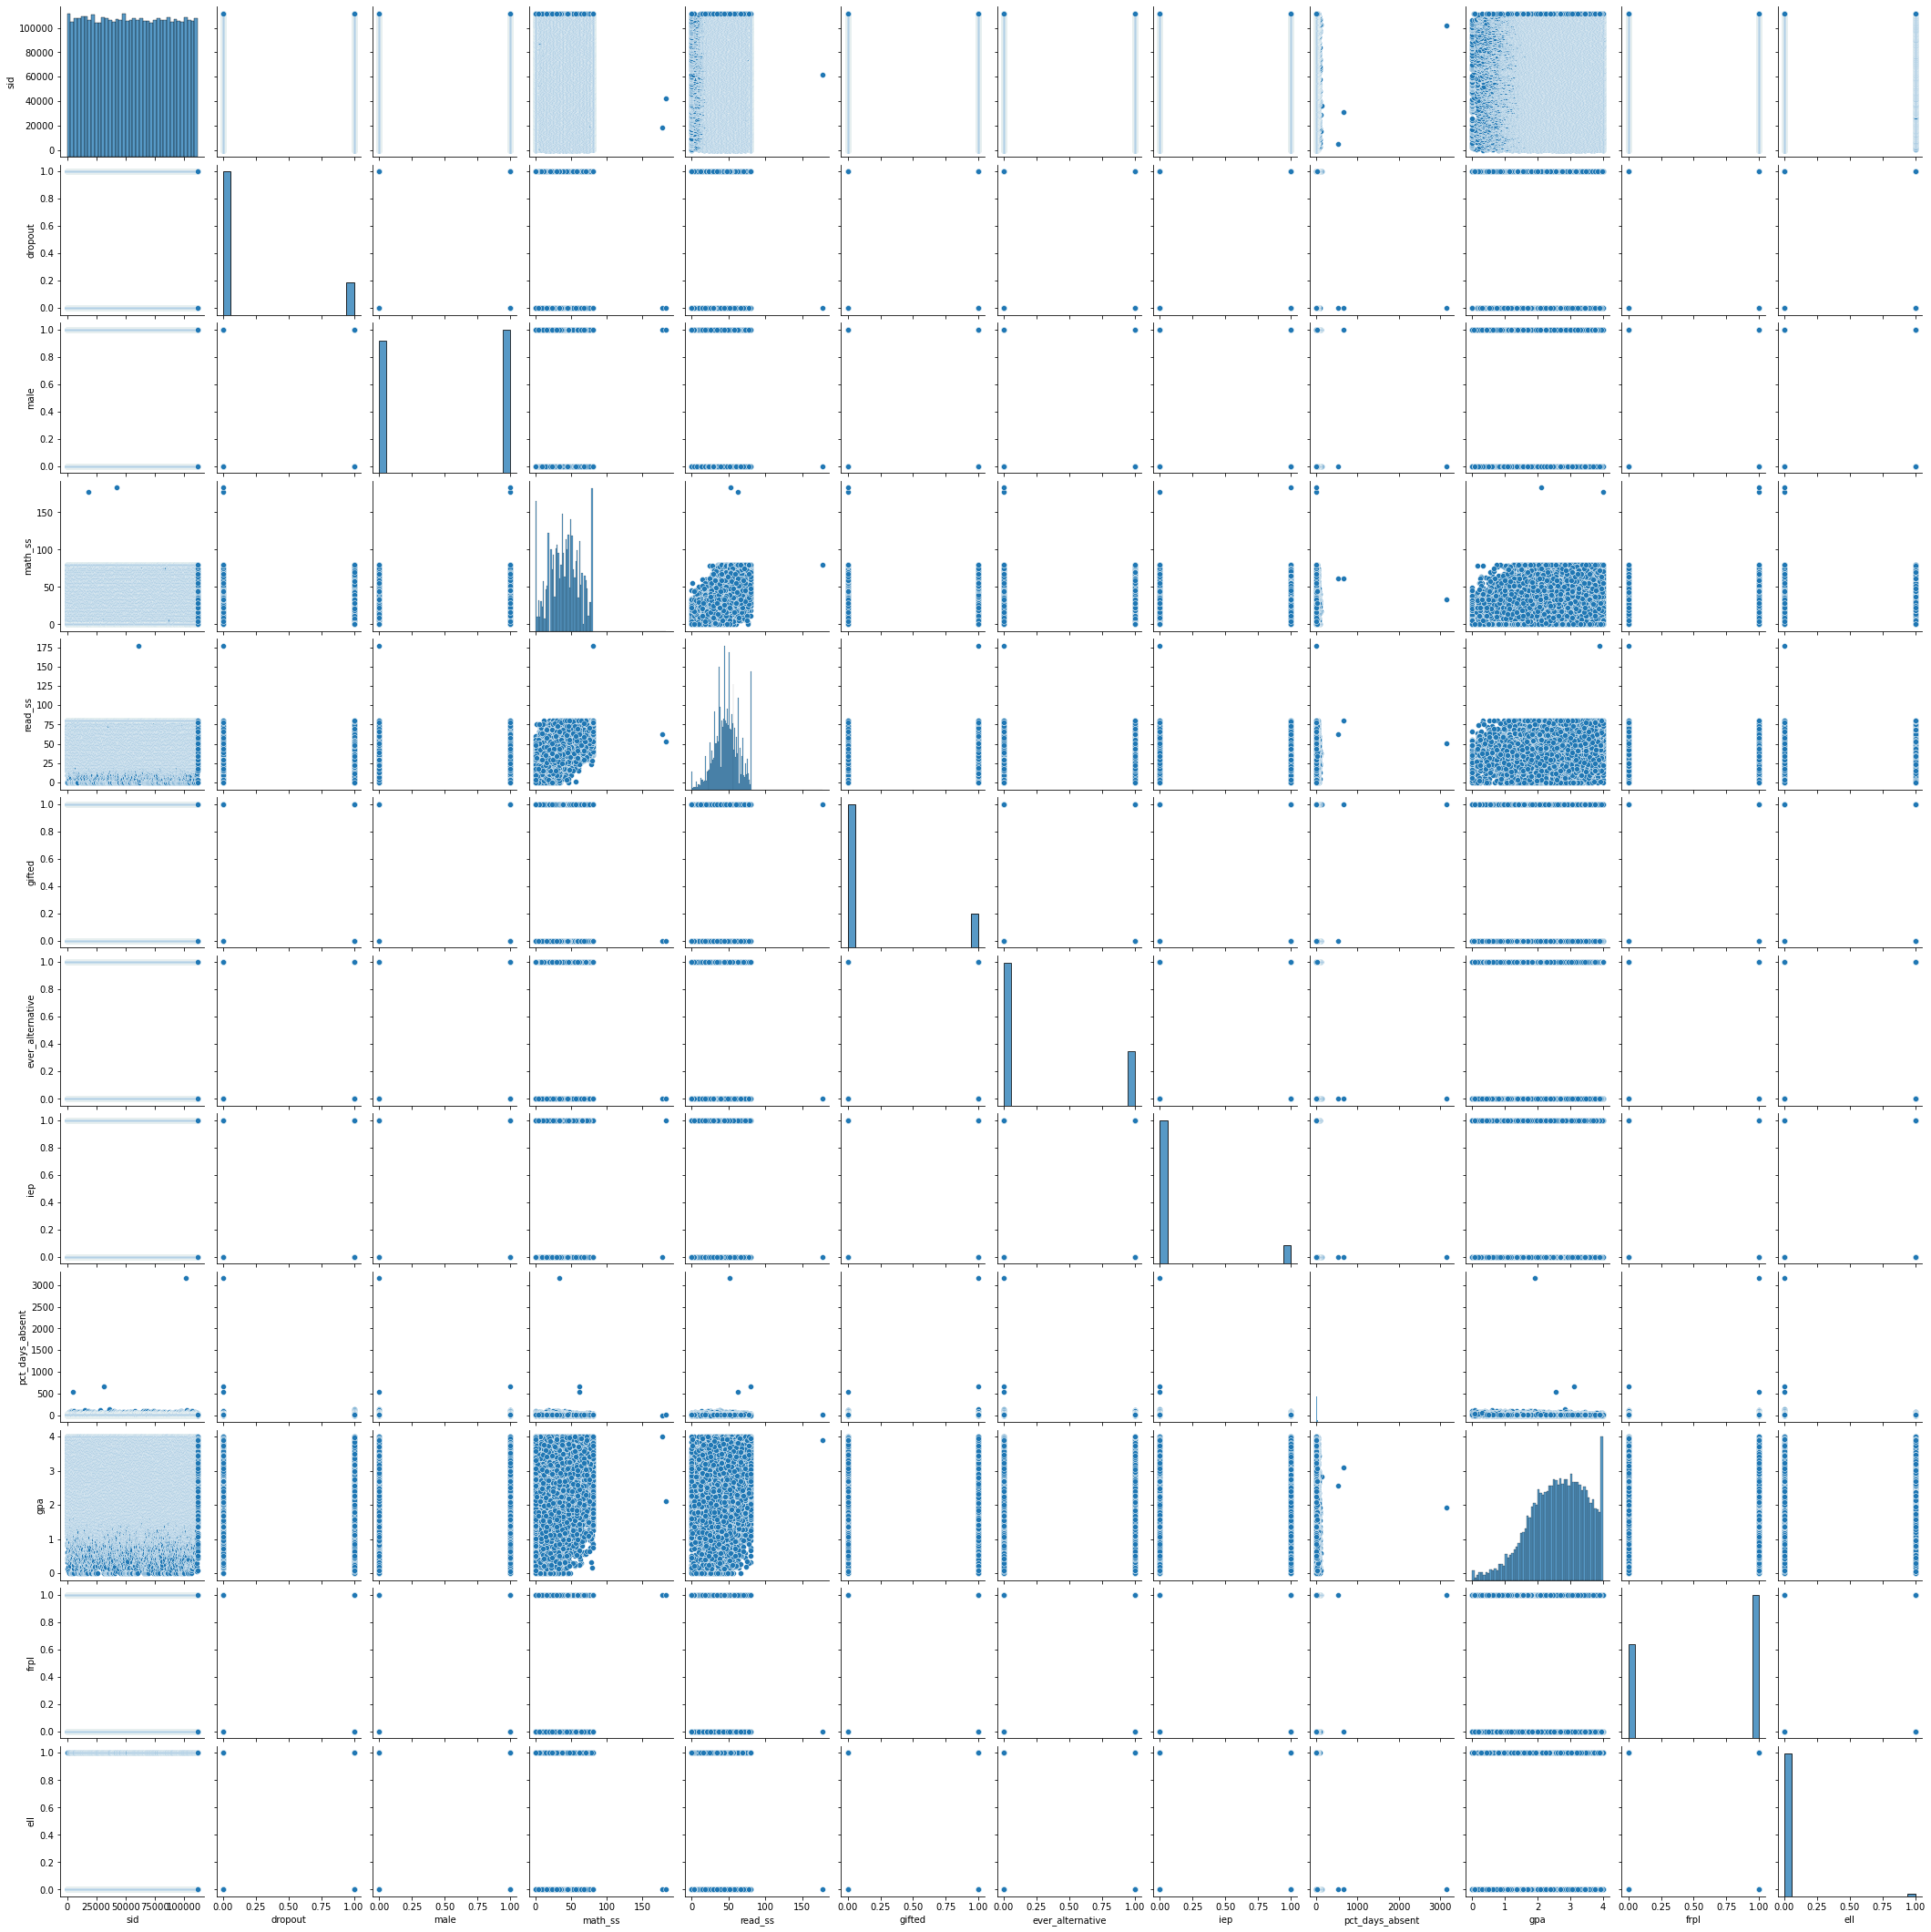

In [10]:
sns.pairplot(fs_dropouts)

This tells us a couple of things:

- most of the data is categorical, with many of the features being binary categorical --> probably better to do a 
- you would think gpa and standardized testing scores would have some kind of relationship, but at first glance there doesn't appear to be any (however there are some pretty significant outlier that may be skewing the data
- notice the distributions of the ss scores and the gpa
- the race data is missing because it is string values(it is still categorical though, so we will have to dummized it
- at this first juncture it looks like the pct_days_absent feature has the strongest correlation with whether or not a student graduates

In [11]:
fs_dropouts['dropout'].value_counts()

0    43053
1     9889
Name: dropout, dtype: int64

In [12]:
fs_dropouts[fs_dropouts['dropout'].isnull()]

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell


/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dropout', ylabel='count'>

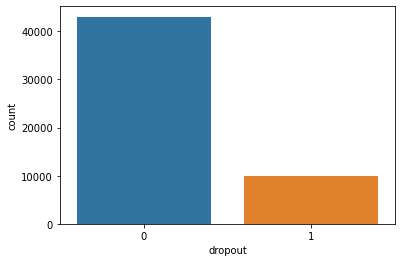

In [13]:
sns.countplot(fs_dropouts["dropout"])

In [14]:
fs_dropouts['dropout'].value_counts()[1]/len(fs_dropouts['dropout'])

0.1867893166106305

Note: we can see the target class is imbalanced(only ~19% are dropouts), so we'll have to account for this when modelling

(array([ 533.,  802., 1747., 3165., 5787., 7624., 8410., 8506., 7855.,
        7291.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

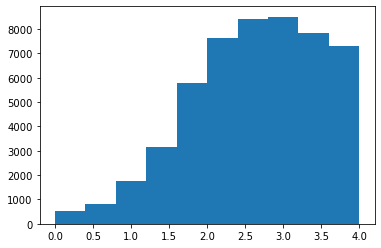

In [15]:
#let's look a little closer at gpa
plt.hist(fs_dropouts['gpa'])

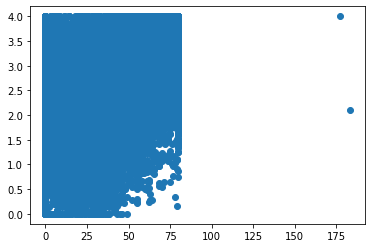

In [16]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa'])

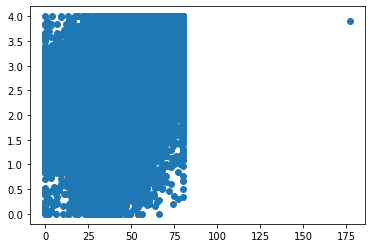

In [17]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

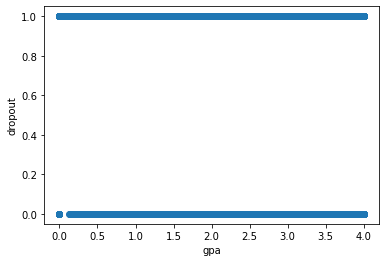

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('gpa')
ax.set_ylabel('dropout')
ax.scatter(fs_dropouts['gpa'], fs_dropouts['dropout'])

let's look at standardized test scores

In [19]:
fs_dropouts[fs_dropouts['math_ss'].isnull()]

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,NaN,NaN,0,1,0,10.664031,1.230000,1.0,0
7,19,1,1.0,White,NaN,NaN,0,1,0,2.949704,NaN,0.0,0
19,50,0,1.0,White,NaN,NaN,0,0,0,2.218260,2.805150,1.0,0
37,89,0,0.0,White,NaN,NaN,0,0,0,9.629684,3.059000,1.0,0
42,94,0,1.0,White,NaN,NaN,0,0,0,3.703593,3.569500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52922,111960,0,1.0,White,NaN,NaN,0,0,0,9.482759,1.718833,1.0,0
52929,111971,0,0.0,African-American,NaN,NaN,0,1,0,5.523810,1.365000,1.0,0
52930,111972,1,1.0,White,NaN,NaN,0,0,0,29.800001,2.000000,0.0,0
52933,111976,0,0.0,White,NaN,NaN,0,1,0,18.629631,2.702367,1.0,0


So the question is what to do with these null...it might be indicative if the values are missing, so we'll have an indicator for missingness. Test scores can't be negative, so let's fill them with negative one. 

In [20]:
fs_dropouts['math_ss'].fillna(-1, inplace=True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [21]:
fs_dropouts['math_ss'].value_counts()

-1.0      8989
 80.0     2035
 0.0      1886
 49.0     1048
 39.0     1044
          ... 
 15.0       97
 3.0        81
 20.0        3
 177.0       1
 183.0       1
Name: math_ss, Length: 84, dtype: int64

In [22]:
fs_dropouts[fs_dropouts['math_ss'] > 100] #<--note it is impossible for math scores to be this high(highest score is 100)

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
8773,18336,0,1.0,White,177.0,62.0,0,0,0,0.827389,4.0000,1.0,0
19990,42106,0,1.0,White,183.0,53.0,0,0,1,14.306123,2.1023,1.0,0


let's drop those rows (it looks like a 1 typo, but I would risk poorly informing the data if I just "fixed" myself, and considering thise is old, anonymized data, I wouldn't be able to figure out the real vals anyway)

In [23]:
fs_dropouts = fs_dropouts[fs_dropouts['math_ss'] < 100]

In [24]:
fs_dropouts['math_ss'].value_counts()

-1.0     8989
 80.0    2035
 0.0     1886
 49.0    1048
 39.0    1044
         ... 
 67.0     120
 17.0     112
 15.0      97
 3.0       81
 20.0       3
Name: math_ss, Length: 82, dtype: int64

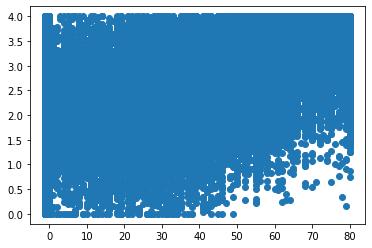

In [25]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa']) #this makes things a little more approachable, specifically the bottom right corner

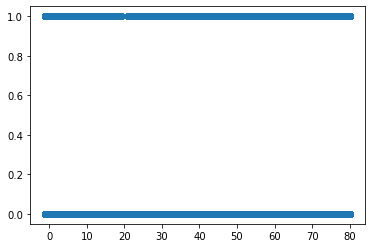

In [26]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['dropout']) 

let's do the same for reading scores

In [27]:
#first find reading scores that are empty
fs_dropouts[fs_dropouts['read_ss'].isnull()]

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,2,0,0.0,White,-1.0,NaN,0,1,0,10.664031,1.230000,1.0,0
7,19,1,1.0,White,-1.0,NaN,0,1,0,2.949704,NaN,0.0,0
19,50,0,1.0,White,-1.0,NaN,0,0,0,2.218260,2.805150,1.0,0
37,89,0,0.0,White,-1.0,NaN,0,0,0,9.629684,3.059000,1.0,0
42,94,0,1.0,White,-1.0,NaN,0,0,0,3.703593,3.569500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52929,111971,0,0.0,African-American,-1.0,NaN,0,1,0,5.523810,1.365000,1.0,0
52930,111972,1,1.0,White,-1.0,NaN,0,0,0,29.800001,2.000000,0.0,0
52931,111973,1,0.0,White,0.0,NaN,0,1,0,16.078279,NaN,1.0,0
52933,111976,0,0.0,White,-1.0,NaN,0,1,0,18.629631,2.702367,1.0,0


In [28]:
fs_dropouts['read_ss'].fillna(-1, inplace = True)

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
fs_dropouts['read_ss'].value_counts()

-1.0      8975
 80.0     1905
 39.0     1332
 45.0     1301
 48.0     1297
          ... 
 5.0        37
 3.0        32
 1.0        30
 2.0        24
 177.0       1
Name: read_ss, Length: 83, dtype: int64

In [30]:
fs_dropouts[fs_dropouts['read_ss'] > 100] 

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
29195,61506,0,0.0,White,80.0,177.0,1,0,0,1.657515,3.898,0.0,0


In [31]:
fs_dropouts = fs_dropouts[fs_dropouts['read_ss'] < 100]

In [32]:
fs_dropouts['read_ss'].value_counts()

-1.0     8975
 80.0    1905
 39.0    1332
 45.0    1301
 48.0    1297
         ... 
 8.0       42
 5.0       37
 3.0       32
 1.0       30
 2.0       24
Name: read_ss, Length: 82, dtype: int64

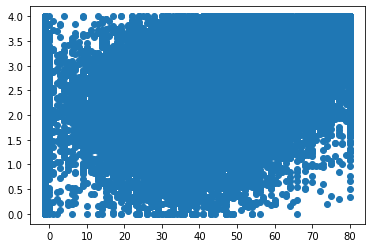

In [33]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

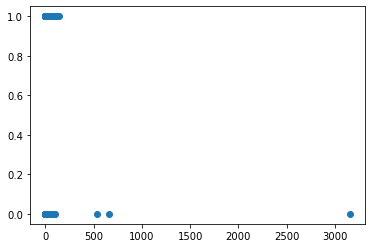

In [34]:
#Let's also look at pct days absent vs dropouts
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout'])

again...let's look at the nulls

In [35]:
fs_dropouts['pct_days_absent'].value_counts()

0.000000     1278
7.692308       15
9.000000       15
10.000000      14
12.500000      14
             ... 
21.578947       1
4.886819        1
33.790951       1
2.994169        1
1.307801        1
Name: pct_days_absent, Length: 32213, dtype: int64

In [36]:
fs_dropouts[fs_dropouts['pct_days_absent'].isnull()]

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
1219,2491,0,1.0,White,29.0,10.0,0,0,1,NaN,2.150000,1.0,0
3660,7639,0,1.0,NaN,-1.0,-1.0,0,1,0,NaN,3.200000,0.0,0
3747,7789,0,0.0,White,-1.0,-1.0,1,0,0,NaN,3.950000,0.0,0
4214,8827,0,0.0,White,-1.0,-1.0,0,0,0,NaN,1.643000,1.0,0
4661,9778,0,1.0,Multiple/Native American,-1.0,-1.0,0,1,0,NaN,3.273250,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49050,103790,0,1.0,African-American,-1.0,-1.0,0,1,0,NaN,3.000000,1.0,0
49299,104345,1,0.0,Hispanic,-1.0,-1.0,0,1,0,NaN,1.913000,1.0,0
49431,104605,0,1.0,White,-1.0,-1.0,0,1,0,NaN,NaN,NaN,0
50035,105824,1,1.0,African-American,-1.0,-1.0,1,1,0,NaN,NaN,0.0,0


In [37]:
#because days can't be neg, I'll indicate missingness here again as neg 1
fs_dropouts['pct_days_absent'].fillna(-1, inplace=True)

In [38]:
fs_dropouts[fs_dropouts['pct_days_absent'].isnull()]

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell


In [39]:
fs_dropouts['pct_days_absent'].value_counts()

 0.000000     1278
-1.000000       87
 9.000000       15
 7.692308       15
 12.500000      14
              ... 
 21.578947       1
 4.886819        1
 33.790951       1
 2.994169        1
 2.965962        1
Name: pct_days_absent, Length: 32214, dtype: int64

Ok, this is PERCENT days absent, so anything over 100 is not possible...so let's just drop those

In [40]:
fs_dropouts[fs_dropouts['pct_days_absent'] > 100] 

,sid,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
2239,4673,0,0.0,Multiple/Native American,62.0,62.0,0,0,0,533.18750,2.556000,1.0,0
7230,15094,1,1.0,African-American,18.0,38.0,0,1,0,118.05007,NaN,1.0,0
13560,28479,1,1.0,White,-1.0,-1.0,0,1,0,116.98468,0.602933,0.0,0
14853,31247,0,1.0,White,62.0,80.0,1,0,0,657.59998,3.101000,0.0,0
17304,36385,1,0.0,African-American,-1.0,-1.0,1,0,0,140.41096,2.827000,NaN,0
48195,101921,0,0.0,White,33.0,51.0,1,0,0,3153.00000,1.917000,1.0,0
48395,102334,1,0.0,African-American,-1.0,-1.0,0,0,0,124.07428,0.083220,NaN,0


In [41]:
fs_dropouts = fs_dropouts[fs_dropouts['pct_days_absent'] < 100]

In [42]:
fs_dropouts['pct_days_absent'].value_counts()

 0.000000     1278
-1.000000       87
 9.000000       15
 7.692308       15
 12.500000      14
              ... 
 4.886819        1
 33.790951       1
 2.994169        1
 1.834564        1
 11.994334       1
Name: pct_days_absent, Length: 32207, dtype: int64

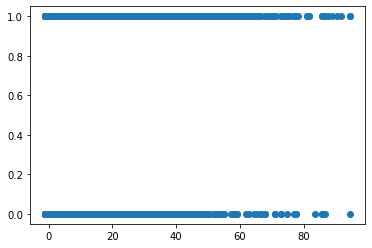

In [43]:
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout']) #this looks a lot more informative

In [44]:
fs_dropouts['race_ethnicity'].value_counts()

White                       42376
African-American             6549
Hispanic                     1709
Multiple/Native American      939
Asian/Pacific Islander        674
Name: race_ethnicity, dtype: int64

In [45]:
def ethnicity_to_numeric(x):
        if x=='White': 
            return 0
        elif x=='African-American':   
            return 1
        elif x=='Hispanic':
            return 2
        elif x=='Multiple/Native American':
            return 3
        elif x=='Asian/Pacific Islander':
            return 4
        else:
            return -1 #if race is null/missing it is accounted for

In [46]:
fs_dropouts['race_num'] = fs_dropouts['race_ethnicity'].apply(ethnicity_to_numeric)

In [47]:
fs_dropouts.drop('race_ethnicity', axis=1, inplace=True) #now that we have the numerical race column, we can get rid of original

Let's look at race_num against the other cols

In [48]:
fs_dropouts['race_num'].value_counts()

 0    42376
 1     6549
 2     1709
 3      939
-1      685
 4      674
Name: race_num, dtype: int64

Let's look at the dataset again and see if things are clean and good to go

In [49]:
fs_dropouts

,sid,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
0,2,0,0.0,-1.0,-1.0,0,1,0,10.664031,1.230000,1.0,0,0
1,5,0,0.0,18.0,46.0,0,0,0,0.969005,2.822795,1.0,0,0
2,12,1,0.0,18.0,35.0,0,1,0,4.746706,0.330000,0.0,0,0
3,13,0,0.0,48.0,80.0,0,0,1,6.850071,2.985000,1.0,0,0
4,14,0,1.0,18.0,30.0,0,0,0,5.802631,2.118500,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,0,1.0,34.0,44.0,0,1,1,9.833898,2.079800,1.0,0,1
52938,111985,0,0.0,23.0,51.0,1,1,0,2.291429,3.443500,0.0,0,0
52939,111986,0,1.0,4.0,18.0,0,0,1,7.766962,1.695142,1.0,0,0
52940,111988,1,1.0,29.0,34.0,0,1,0,15.343004,1.567000,1.0,0,1


In [50]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52932 entries, 0 to 52941
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sid               52932 non-null  int64  
 1   dropout           52932 non-null  int64  
 2   male              52921 non-null  float64
 3   math_ss           52932 non-null  float64
 4   read_ss           52932 non-null  float64
 5   gifted            52932 non-null  int64  
 6   ever_alternative  52932 non-null  int64  
 7   iep               52932 non-null  int64  
 8   pct_days_absent   52932 non-null  float64
 9   gpa               51711 non-null  float64
 10  frpl              52250 non-null  float64
 11  ell               52932 non-null  int64  
 12  race_num          52932 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.7 MB


There are still a few students missing gender, frpl, and gpa information

So the question is should we remove these or add some missingness indicatior like we did for race/ethnicity...

In [51]:
#Let's add missing indicator
fs_dropouts['male'] = fs_dropouts['male'].fillna(-1)

In [52]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52932 entries, 0 to 52941
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sid               52932 non-null  int64  
 1   dropout           52932 non-null  int64  
 2   male              52932 non-null  float64
 3   math_ss           52932 non-null  float64
 4   read_ss           52932 non-null  float64
 5   gifted            52932 non-null  int64  
 6   ever_alternative  52932 non-null  int64  
 7   iep               52932 non-null  int64  
 8   pct_days_absent   52932 non-null  float64
 9   gpa               51711 non-null  float64
 10  frpl              52250 non-null  float64
 11  ell               52932 non-null  int64  
 12  race_num          52932 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.7 MB


lastly, let's do the same with gpa and free lunch

In [53]:
#Let's add missing indicator
fs_dropouts['gpa'] = fs_dropouts['gpa'].fillna(-1)
#Let's add missing indicator
fs_dropouts['frpl'] = fs_dropouts['frpl'].fillna(-1)

In [54]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52932 entries, 0 to 52941
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sid               52932 non-null  int64  
 1   dropout           52932 non-null  int64  
 2   male              52932 non-null  float64
 3   math_ss           52932 non-null  float64
 4   read_ss           52932 non-null  float64
 5   gifted            52932 non-null  int64  
 6   ever_alternative  52932 non-null  int64  
 7   iep               52932 non-null  int64  
 8   pct_days_absent   52932 non-null  float64
 9   gpa               52932 non-null  float64
 10  frpl              52932 non-null  float64
 11  ell               52932 non-null  int64  
 12  race_num          52932 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.7 MB


YAY!!! WE'VE CLEANED OUR DATA! LET'S SAVE IT TO A CSV!

In [55]:
fs_dropouts.to_csv('data/9th_grade_dropouts.csv', index=False)

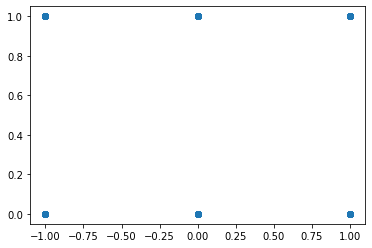

In [56]:
plt.scatter(fs_dropouts['frpl'], fs_dropouts['dropout'])

In [57]:
pd.crosstab(fs_dropouts['frpl'], fs_dropouts['dropout'])

dropout,0,1
frpl,,
-1.0,423,259
0.0,18058,2632
1.0,24566,6994


In [58]:
6994/len(fs_dropouts['frpl'])

0.13213179173278924

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'sid'}>,
        <AxesSubplot:title={'center':'dropout'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'math_ss'}>],
       [<AxesSubplot:title={'center':'read_ss'}>,
        <AxesSubplot:title={'center':'gifted'}>,
        <AxesSubplot:title={'center':'ever_alternative'}>,
        <AxesSubplot:title={'center':'iep'}>],
       [<AxesSubplot:title={'center':'pct_days_absent'}>,
        <AxesSubplot:title={'center':'gpa'}>,
        <AxesSubplot:title={'center':'frpl'}>,
        <AxesSubplot:title={'center':'ell'}>],
       [<AxesSubplot:title={'center':'race_num'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

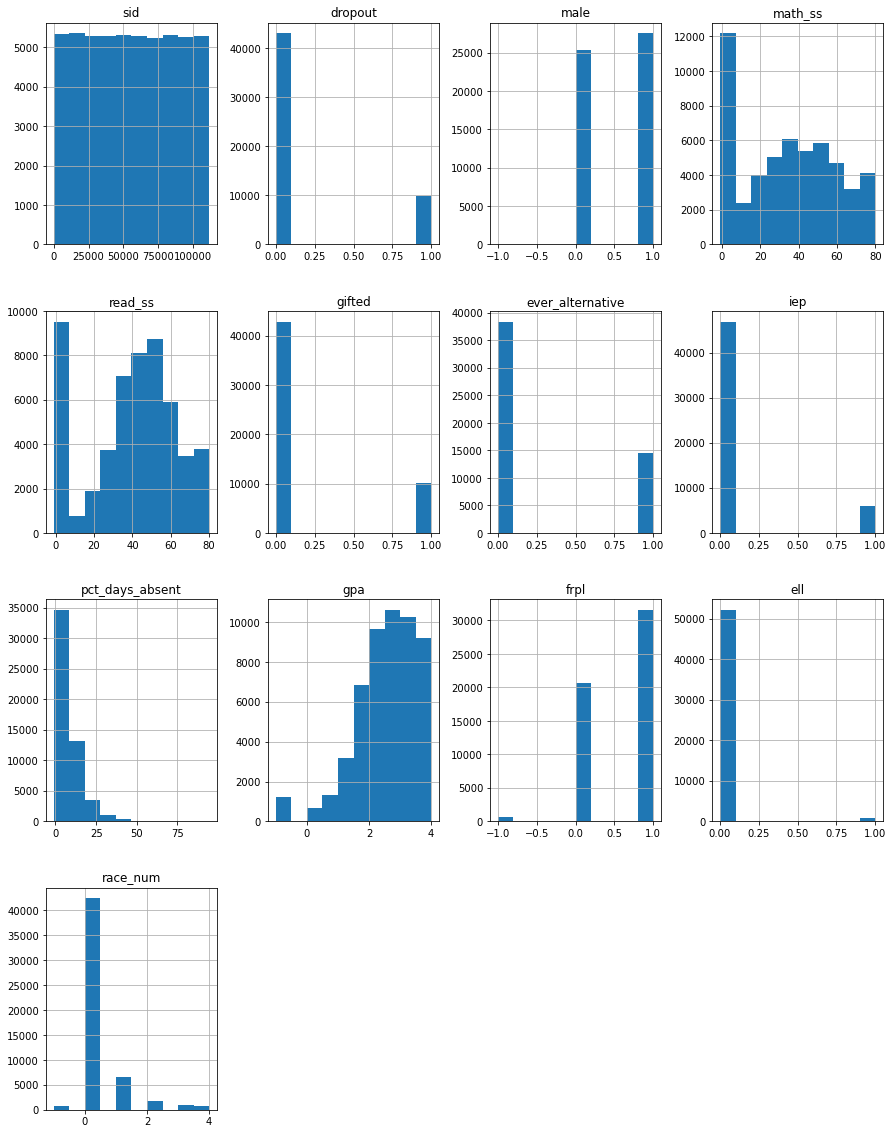

In [59]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
fs_dropouts.hist(ax = ax)

In [60]:
true_dropouts = fs_dropouts[fs_dropouts['dropout'] == 1]

(array([ 259.,    0.,    0.,    0.,    0., 2632.,    0.,    0.,    0.,
        6994.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

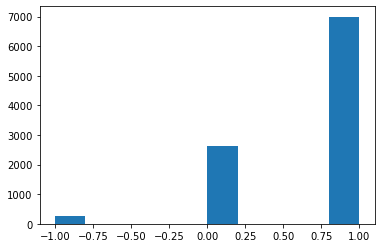

In [61]:
plt.hist(true_dropouts['frpl'])

In [62]:
grads = fs_dropouts[fs_dropouts['dropout'] != 1]

(array([  423.,     0.,     0.,     0.,     0., 18058.,     0.,     0.,
            0., 24566.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

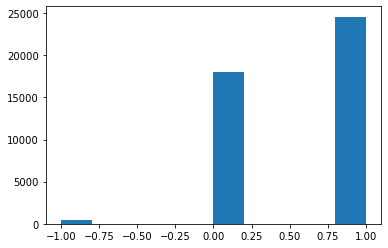

In [63]:
plt.hist(grads['frpl'])

In [64]:
frpl = fs_dropouts[fs_dropouts['frpl'] == 1]

(array([24566.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6994.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

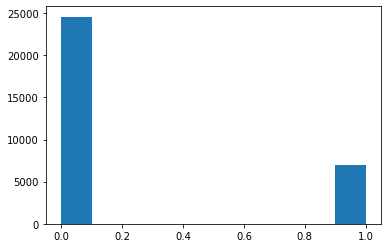

In [65]:
plt.hist(frpl['dropout']) #this one doesn't really mean much...

In [66]:
fs_dropouts[fs_dropouts['dropout'] == 1].describe()

,sid,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
count,9885.000000,9885.0,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000
mean,55855.226201,1.0,0.595448,19.925746,26.334143,0.094284,0.446434,0.151947,14.155953,1.618265,0.681335,0.027921,0.384522
std,32400.644126,0.0,0.491448,22.351877,23.813702,0.292239,0.497148,0.358988,11.790239,1.170869,0.519180,0.164755,0.802757
min,12.000000,1.0,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,27738.000000,1.0,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,5.622391,1.000000,0.000000,0.000000,0.000000
50%,55759.000000,1.0,1.000000,15.000000,29.000000,0.000000,0.000000,0.000000,11.665601,1.669500,1.000000,0.000000,0.000000
75%,84108.000000,1.0,1.000000,36.000000,45.000000,0.000000,1.000000,0.000000,19.543192,2.393000,1.000000,0.000000,1.000000
max,111988.000000,1.0,1.000000,80.000000,80.000000,1.000000,1.000000,1.000000,94.444443,4.000000,1.000000,1.000000,4.000000


In [67]:
true_dropouts

,sid,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
2,12,1,0.0,18.0,35.0,0,1,0,4.746706,0.330000,0.0,0,0
7,19,1,1.0,-1.0,-1.0,0,1,0,2.949704,-1.000000,0.0,0,0
11,30,1,0.0,55.0,66.0,0,1,0,13.785586,3.173095,1.0,0,0
22,54,1,0.0,72.0,66.0,1,1,0,7.451411,3.648700,0.0,0,0
24,59,1,0.0,24.0,45.0,0,0,1,24.603687,0.800000,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52915,111945,1,1.0,0.0,-1.0,0,1,0,9.280397,1.384733,1.0,0,1
52919,111952,1,0.0,0.0,48.0,0,1,1,6.518249,2.753710,1.0,0,1
52930,111972,1,1.0,-1.0,-1.0,0,0,0,29.800001,2.000000,0.0,0,0
52931,111973,1,0.0,0.0,-1.0,0,1,0,16.078279,-1.000000,1.0,0,0


In [71]:
grads

,sid,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell,race_num
0,2,0,0.0,-1.0,-1.0,0,1,0,10.664031,1.230000,1.0,0,0
1,5,0,0.0,18.0,46.0,0,0,0,0.969005,2.822795,1.0,0,0
3,13,0,0.0,48.0,80.0,0,0,1,6.850071,2.985000,1.0,0,0
4,14,0,1.0,18.0,30.0,0,0,0,5.802631,2.118500,1.0,0,0
5,15,0,0.0,18.0,30.0,0,0,0,8.466276,1.705000,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52936,111982,0,0.0,45.0,39.0,0,0,0,15.894397,3.066000,1.0,0,0
52937,111984,0,1.0,34.0,44.0,0,1,1,9.833898,2.079800,1.0,0,1
52938,111985,0,0.0,23.0,51.0,1,1,0,2.291429,3.443500,0.0,0,0
52939,111986,0,1.0,4.0,18.0,0,0,1,7.766962,1.695142,1.0,0,0


(array([3726., 3319., 1742.,  635.,  270.,  106.,   41.,   25.,   10.,
          11.]),
 array([-1.       ,  8.5444443, 18.0888886, 27.6333329, 37.1777772,
        46.7222215, 56.2666658, 65.8111101, 75.3555544, 84.8999987,
        94.444443 ]),
 <BarContainer object of 10 artists>)

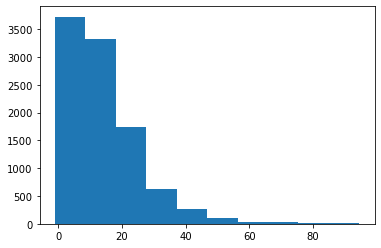

In [72]:
plt.hist(true_dropouts['pct_days_absent'])

(array([3.0904e+04, 9.7880e+03, 1.8090e+03, 3.7300e+02, 1.0900e+02,
        3.4000e+01, 1.1000e+01, 9.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([-1.       ,  8.5444443, 18.0888886, 27.6333329, 37.1777772,
        46.7222215, 56.2666658, 65.8111101, 75.3555544, 84.8999987,
        94.444443 ]),
 <BarContainer object of 10 artists>)

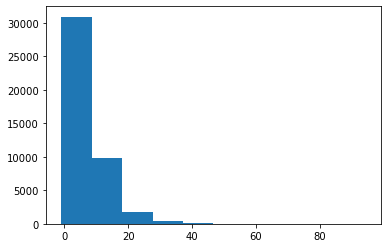

In [73]:
plt.hist(grads['pct_days_absent'])

(array([ 774.,    0.,  584., 1111., 1812., 1832., 1599., 1019.,  671.,
         483.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

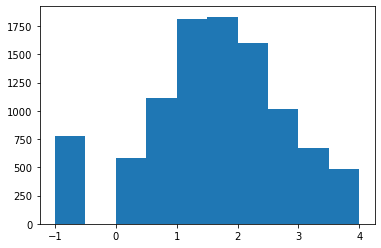

In [74]:
plt.hist(true_dropouts['gpa'])

(array([ 447.,    0.,   72.,  230., 1356., 5034., 8032., 9585., 9597.,
        8694.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

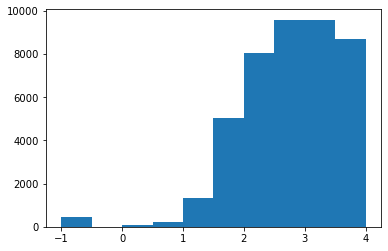

In [75]:
plt.hist(grads['gpa'])